In [1]:
with open('./data/input_13.txt') as fh:
    file_input = fh.read().strip()

In [2]:
from intcode import intcode

In [3]:
mem = [int(d) for d in file_input.split(',')]
stack = []
ic = intcode(mem, add_mem=1000, give_output=stack.append)
ic.run()

99

In [4]:
# part 1
sum([1 for i in stack[2::3] if i == 2])

363

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [6]:
from collections import defaultdict
def split_output(px):
    screen = defaultdict(list)
    score = 0
    while px:
        a, b, c = (px.pop(), px.pop(), px.pop())
        if c == -1:
            score = a
        else:
            screen[a].append((b, c))
    return screen, score

In [7]:
def initfield(scr):
    ey, ex = np.array(list(zip(*scr[0])))
    wy, wx = np.array(list(zip(*scr[1])))
    by, bx = np.array(list(zip(*scr[2])))
    pdl_y, pdl_x = scr[3][0]
    ball_y, ball_x = scr[4][0]

    field = np.zeros((wx.max()+1, wy.max()+1))
    field[wx, wy] = 1
    field[bx, by] = 2
    field[pdl_x, pdl_y] = 3
    field[ball_x, ball_y] = 4
    return field

def update_field(field, scr):
    if 0 in scr:
        ey, ex = np.array(list(zip(*scr[0])))
        field[ex, ey] = 0
    if 1 in scr: 
        wy, wx = np.array(list(zip(*scr[1])))
        field[wx, wy] = 1
    if 2 in scr:
        by, bx = np.array(list(zip(*scr[2])))
        field[bx, by] = 2
    
    if 3 in scr:
        pdl_y, pdl_x = scr[3][0]
        field[pdl_x, pdl_y] = 3

    if 4 in scr:
        ball_y, ball_x = scr[4][0]
        field[ball_x, ball_y] = 4
    
    return field
        

In [8]:
# part 2
mem = [int(d) for d in file_input.split(',')]
mem[0] = 2
stack = []
_inp = []
ic = intcode(mem, add_mem=1000, take_input=_inp.pop, give_output=stack.append)
ret = 0
step = 0
field = None
frames = []
while ret != 99:
    ret = ic.run()
    scr, new_score = split_output(stack)
    if field is None:
        field = initfield(scr)
    else:
        field = update_field(field, scr)
    if new_score:
        score = new_score
    if ret == 99:
        print('final score {} after {} steps'.format(score, step))
        break
    ball_x = scr[4][0][1]
    if 3 in scr:
        pdl_x = scr[3][0][1]
    _inp.append(int(np.sign(ball_x - pdl_x)))
    if (step%1000) == 0:
        print(step)
    frames.append(field.T.copy())  
#         render(scr)
#     render(scr)
    step += 1
#     print(step)
#     render(scr)
    if step > 1e6:
        break

0
1000
2000
3000
4000
5000
final score 17159 after 5938 steps


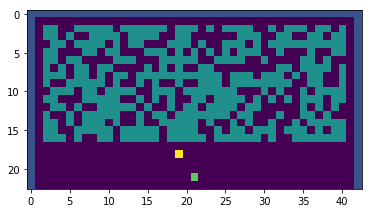

In [9]:
im = plt.imshow(frames[0])
def animate_func(i):
    im.set_array(frames[i])
    return [im]

anim = animation.FuncAnimation(
                               plt.gcf(), 
                               animate_func, 
                               frames = len(frames),
                               interval = 10, # in ms
                               )

In [10]:
anim.save('test_anim.mp4', fps=24, extra_args=['-vcodec', 'libx264'])

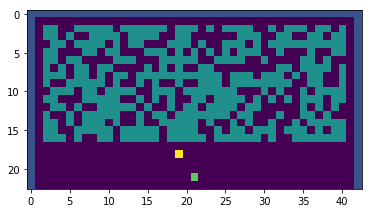

In [168]:
f = initfield(scr).T
plt.imshow(f)